In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer


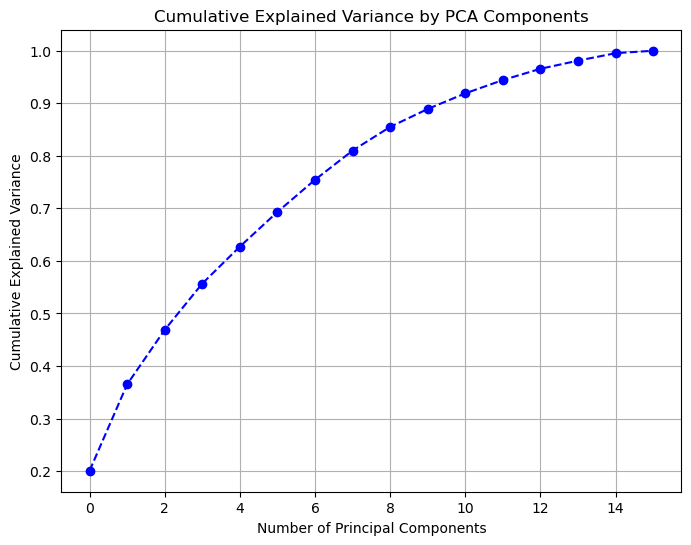

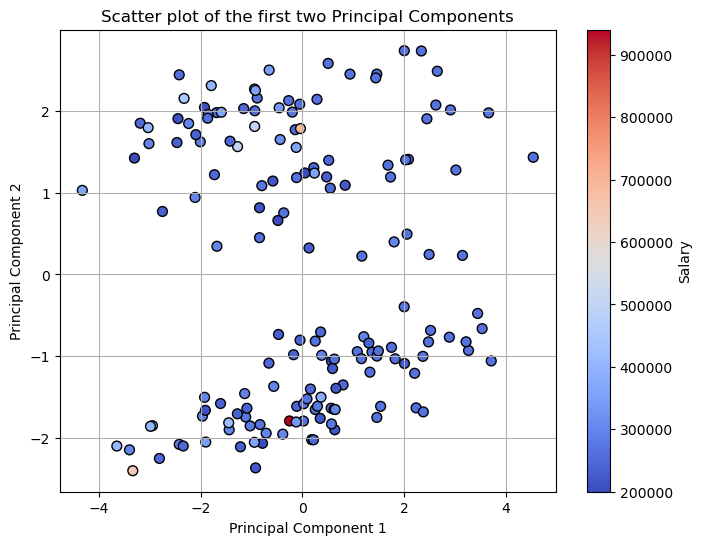

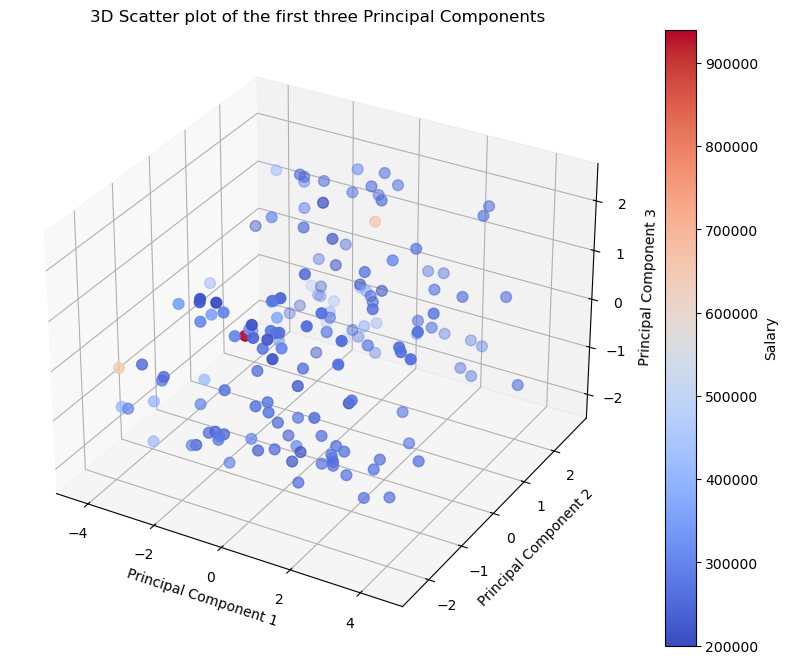

In [5]:
# 1. Load dataset
placement_data_df = pd.read_csv('Placement_Data_Full_Class.csv')

# 2. Handle missing values
# Impute missing values for salary with median
placement_data_df['salary'] = placement_data_df['salary'].fillna(placement_data_df['salary'].median())

# Dropping rows where 'status' is missing since it's important
placement_data_df = placement_data_df.dropna(subset=['status'])

# 3. Encoding categorical variables
# Label Encoding for binary categories
label_encoder = LabelEncoder()
placement_data_df['gender'] = label_encoder.fit_transform(placement_data_df['gender'])  # 0: Female, 1: Male
placement_data_df['workex'] = label_encoder.fit_transform(placement_data_df['workex'])  # 0: No, 1: Yes
placement_data_df['status'] = label_encoder.fit_transform(placement_data_df['status'])  # 0: Not Placed, 1: Placed

# Perform one-hot encoding for other categorical variables
categorical_columns = placement_data_df.columns[placement_data_df.dtypes == object]  # Find all categorical columns
placement_data_df = pd.get_dummies(placement_data_df, columns=categorical_columns, drop_first=True)

# 4. Create training / test split
X = placement_data_df.drop('salary', axis=1)  # Features (excluding 'salary')
y = placement_data_df['salary']  # Target (salary)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# 5. Standardize the dataset
sc = StandardScaler()
sc.fit(X_train)  # Fit the scaler on the training data

# Standardize both training and testing data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 6. Perform PCA
pca = PCA()  # You can specify 'n_components' to reduce dimensions, or leave it empty to keep all components

# Fit PCA on the standardized training data and transform both train and test sets
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# 7. Explained variance plot
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot Cumulative Explained Variance by PCA Components
plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# 8. 2D Scatter Plot of the first two Principal Components
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=50)
plt.title('Scatter plot of the first two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Salary')
plt.grid(True)
plt.show()

# 9. Optional: 3D Scatter Plot of the first three Principal Components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='coolwarm', s=60)
plt.title('3D Scatter plot of the first three Principal Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(sc, label='Salary')
plt.show()

# Now X_train_pca and X_test_pca are transformed versions of your original dataset ready for further analysis or modeling.


This scatter plot visualizes the first two principal components (PC1 and PC2) obtained from applying PCA to your dataset, with each point representing a data sample. The color of the points represents the corresponding salary, with the color bar indicating the salary scale, ranging from low salaries (in blue) to high salaries (in red).

### Key Points:

1. **Principal Components (X and Y axes)**:
   - The **X-axis** represents the first principal component (PC1), which explains the most variance in the data.
   - The **Y-axis** represents the second principal component (PC2), explaining the second-largest amount of variance.
   - These two components are linear combinations of the original features, capturing the most important information while reducing the dimensionality of the dataset.

2. **Salary Distribution (Color)**:
   - The color bar on the right shows how salary is distributed across the points. Blue colors represent lower salaries, and as the color shifts to red, the salaries increase.
   - From the scatter plot, most data points are in blue, indicating that the majority of the dataset falls into the lower salary ranges, while only a few red and orange points represent higher salaries.
   
3. **Patterns in the Data**:
   - **Clustering**: There are no clear, distinct clusters in this plot, indicating that the first two principal components do not fully separate the data based on salary. The points seem to be spread across the two dimensions with some overlap.
   - **High Salary Points**: The points with higher salaries (red to orange) are somewhat scattered, which could imply that salary is not linearly separable by the first two principal components alone. Higher salaries may depend on a more complex combination of features.

### Insights:
- **Variance Explanation**: The first two components provide a good view of the variance in the dataset, but since there is no obvious clustering or separation of high-salary vs. low-salary points, it might indicate that additional principal components (beyond the first two) or other features are important in explaining salary.
- **Visualization Limitation**: PCA reduces the data into components that maximize variance, but this doesn’t always directly correlate with the target variable (in this case, salary). While PC1 and PC2 are useful for dimensionality reduction and visualizing the overall variance in the data, they may not provide full insight into salary distribution patterns.

To gain deeper insights into the relationship between salary and other features, additional components (or perhaps a non-linear transformation) might need to be analyzed.

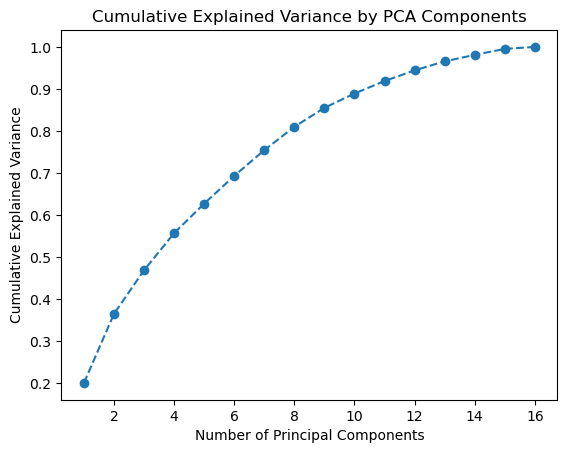

In [6]:
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assume n_components is set to the number of desired components
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Predict using the test data
y_pred = model.predict(X_test_pca)

# Evaluate the model performance (e.g., with RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 47997.38702103803


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


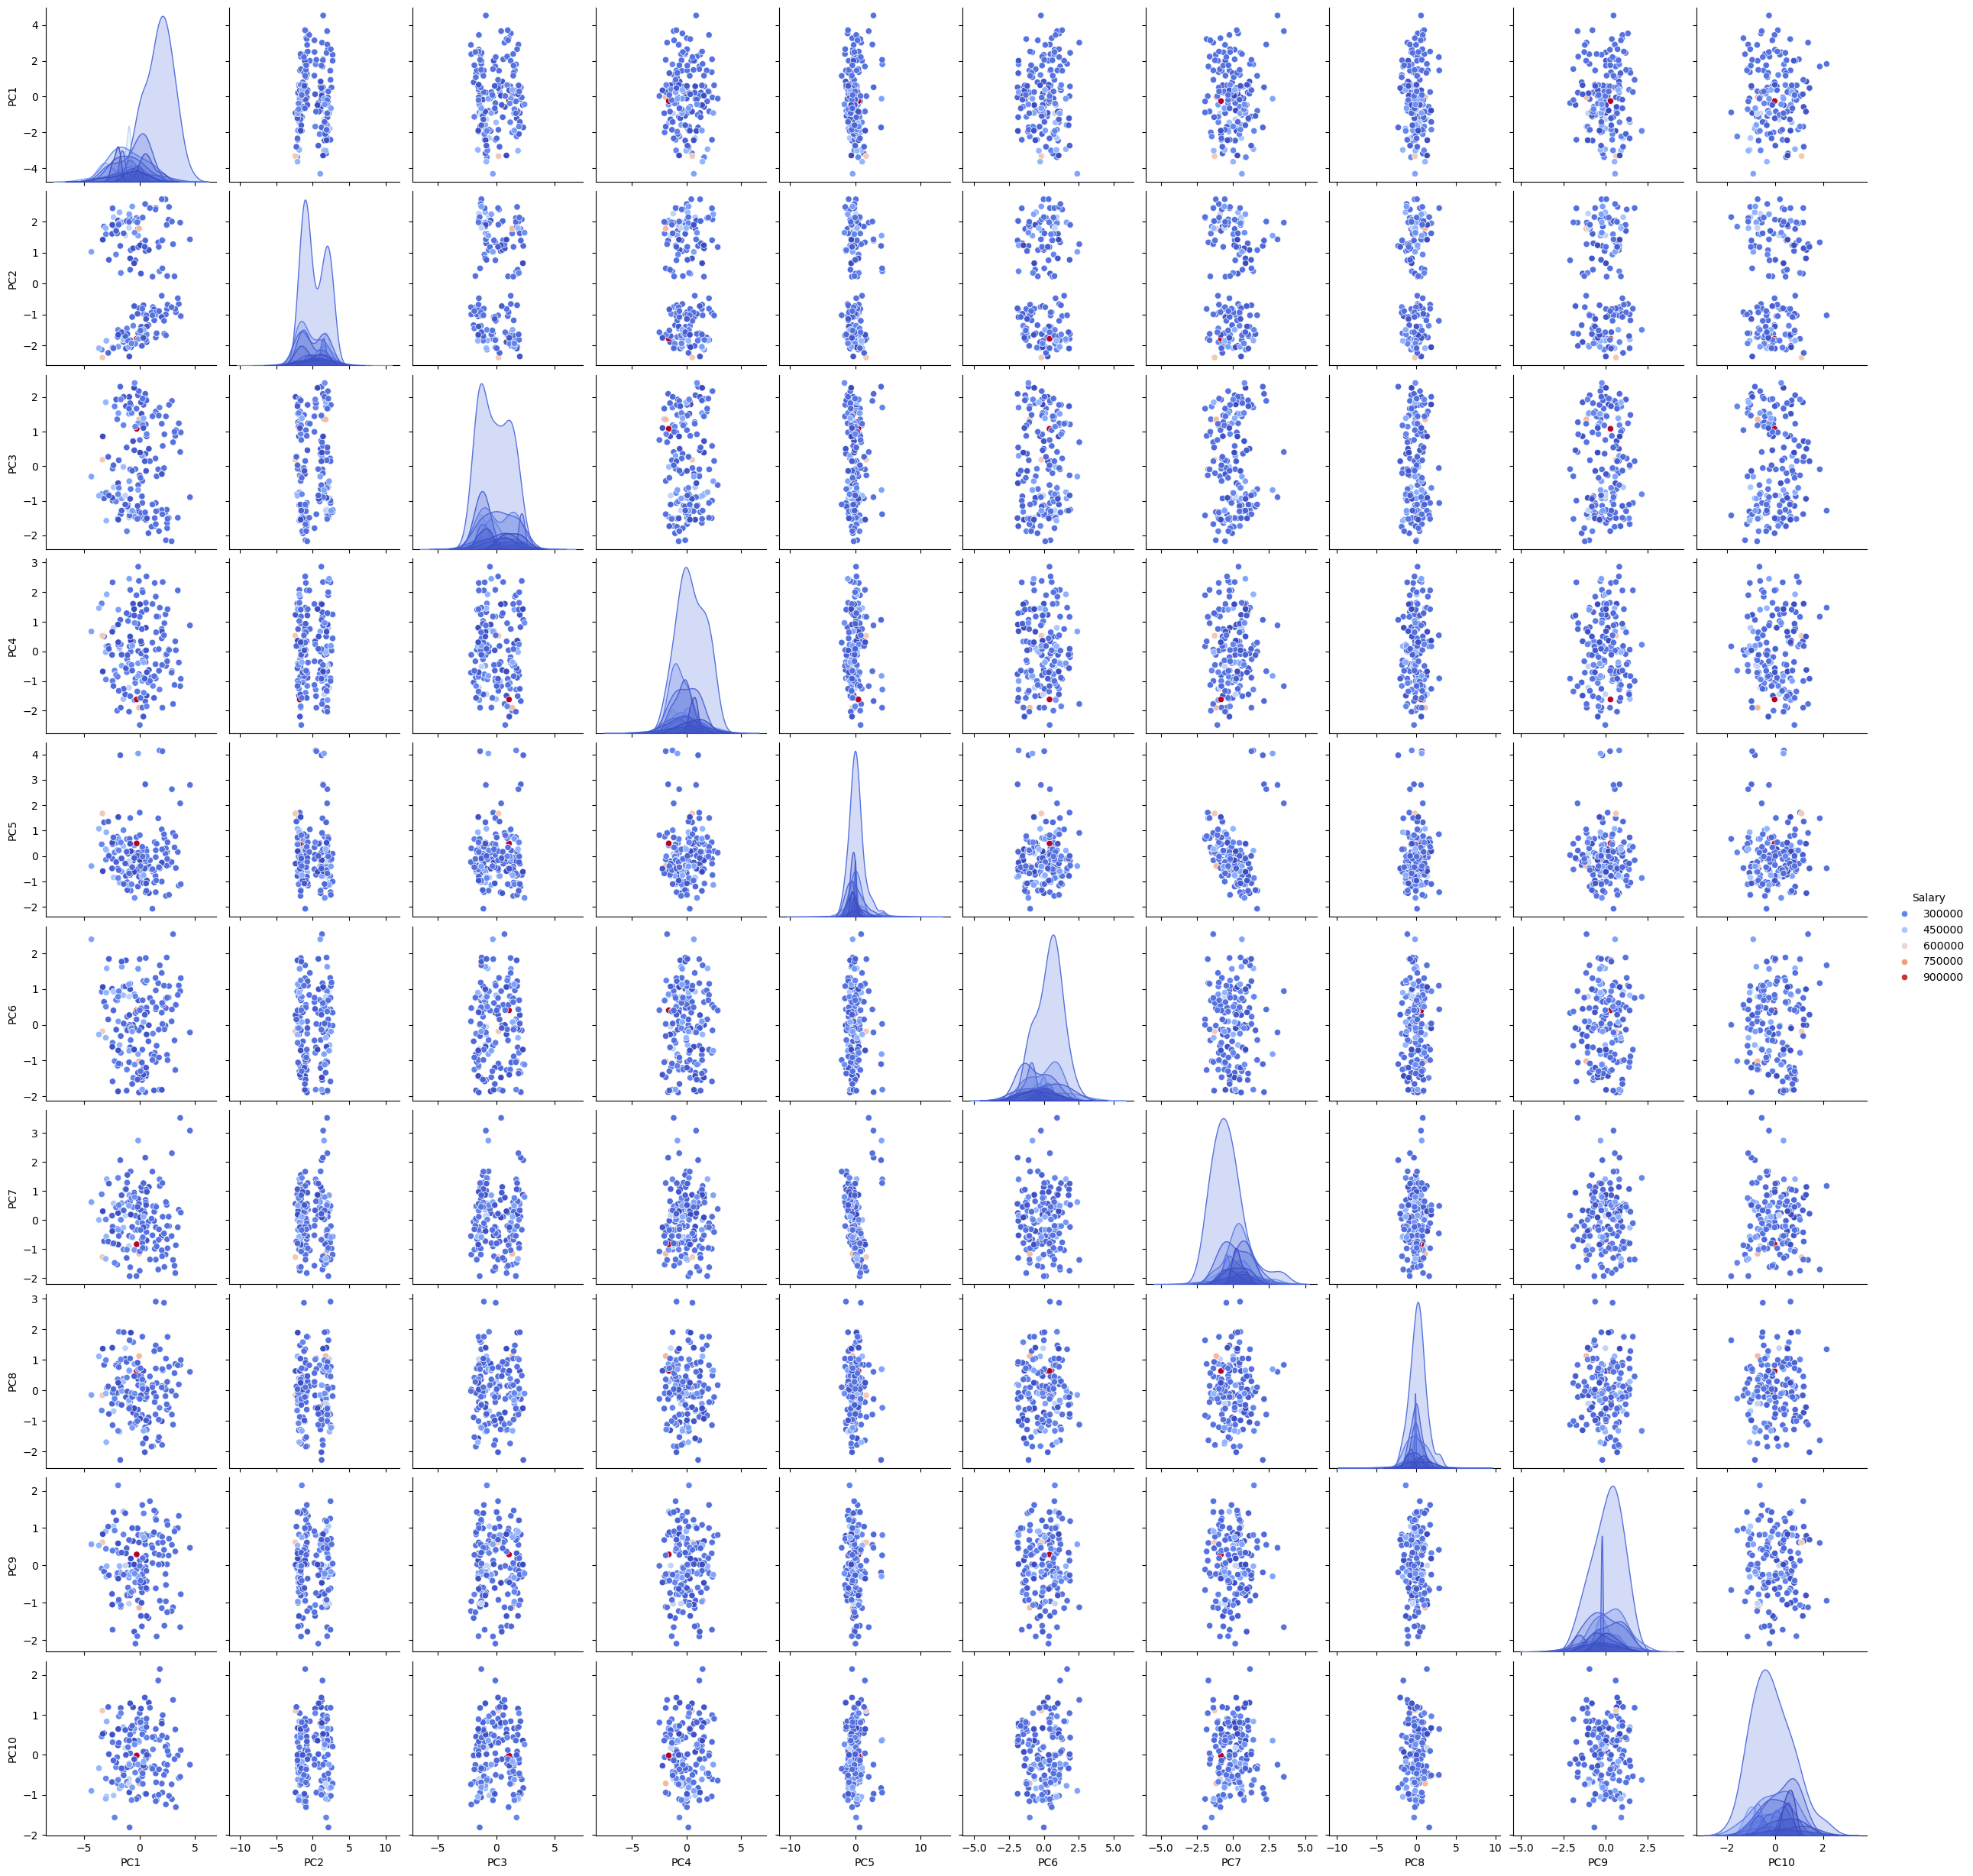

In [11]:
pca_df = pd.DataFrame(X_train_pca[:, :10], columns=[f'PC{i+1}' for i in range(10)])
pca_df['Salary'] = y_train.values  # Add salary as a reference


sns.pairplot(pca_df, hue='Salary', palette='coolwarm')
plt.show()

In [16]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='2d')

ax.scatter(X_train_pca[:, 2], X_train_pca[:, 3], c=y_train, cmap='coolwarm', edgecolor='k')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D Scatter plot of First Three Principal Components')
plt.show()

ValueError: Unknown projection '2d'

<Figure size 800x600 with 0 Axes>